### KMeans图像进行聚类

#### 导包和加载数据

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
pixel = plt.imread('./11-bird.png')
pixel

array([[[0.85882354, 0.7058824 , 0.40392157],
        [0.9019608 , 0.7254902 , 0.45490196],
        [0.8862745 , 0.7294118 , 0.43137255],
        ...,
        [0.05490196, 0.05882353, 0.05098039],
        [0.05098039, 0.05882353, 0.04705882],
        [0.04705882, 0.05490196, 0.04705882]],

       [[0.9019608 , 0.75686276, 0.46666667],
        [0.8784314 , 0.7529412 , 0.47058824],
        [0.8862745 , 0.7529412 , 0.4862745 ],
        ...,
        [0.0627451 , 0.0627451 , 0.05098039],
        [0.05490196, 0.05882353, 0.03921569],
        [0.04313726, 0.05490196, 0.03529412]],

       [[0.89411765, 0.7490196 , 0.48235294],
        [0.89411765, 0.7490196 , 0.4745098 ],
        [0.8627451 , 0.7254902 , 0.4627451 ],
        ...,
        [0.05490196, 0.0627451 , 0.05098039],
        [0.05098039, 0.05098039, 0.04313726],
        [0.04313726, 0.05882353, 0.03921569]],

       ...,

       [[0.05882353, 0.07058824, 0.0627451 ],
        [0.07058824, 0.08235294, 0.07058824],
        [0.07058824, 0

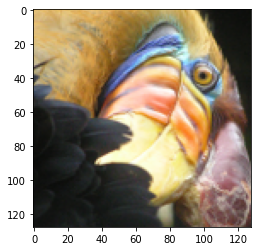

In [3]:
plt.imshow(pixel)

#### 查看

In [4]:
pixel.shape

(128, 128, 3)

In [5]:
128 * 128 # 总的像素值【会有重复】

16384

In [12]:
# 非重复的像素
data2 = pixel.reshape(-1,3)
display(data2,data2.shape)

array([[0.85882354, 0.7058824 , 0.40392157],
       [0.9019608 , 0.7254902 , 0.45490196],
       [0.8862745 , 0.7294118 , 0.43137255],
       ...,
       [0.25490198, 0.16862746, 0.15294118],
       [0.22745098, 0.14509805, 0.14901961],
       [0.20392157, 0.15294118, 0.13333334]], dtype=float32)

(16384, 3)

In [13]:
# 不合适，调整axis
result = np.unique(data2,axis = 0)
display(result,result.shape)

array([[0.03529412, 0.03921569, 0.03529412],
       [0.03529412, 0.04313726, 0.03529412],
       [0.03921569, 0.04705882, 0.04313726],
       ...,
       [1.        , 1.        , 0.95686275],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9843137 ]], dtype=float32)

(13930, 3)

In [14]:
import pandas as pd

In [15]:
data3 = pd.DataFrame(data2)
data3

,0,1,2
0,0.858824,0.705882,0.403922
1,0.901961,0.725490,0.454902
2,0.886275,0.729412,0.431373
3,0.874510,0.725490,0.411765
4,0.882353,0.701961,0.403922
...,...,...,...
16379,0.380392,0.274510,0.250980
16380,0.317647,0.215686,0.176471
16381,0.254902,0.168627,0.152941
16382,0.227451,0.145098,0.149020


In [16]:
data3.drop_duplicates() # 去重操作

,0,1,2
0,0.858824,0.705882,0.403922
1,0.901961,0.725490,0.454902
2,0.886275,0.729412,0.431373
3,0.874510,0.725490,0.411765
4,0.882353,0.701961,0.403922
...,...,...,...
16379,0.380392,0.274510,0.250980
16380,0.317647,0.215686,0.176471
16381,0.254902,0.168627,0.152941
16382,0.227451,0.145098,0.149020


总数据是16384像素  
非重复的像素是13930个像素

In [17]:
model = KMeans(n_clusters=8)
model.fit(data2)

KMeans()

In [19]:
newPixel = model.cluster_centers_ # 聚类中心
newPixel

array([[0.7107792 , 0.699121  , 0.7407708 ],
       [0.10186854, 0.10852742, 0.09876087],
       [0.7688073 , 0.56134456, 0.2803808 ],
       [0.8587272 , 0.7112607 , 0.464253  ],
       [0.2721258 , 0.24686253, 0.24090159],
       [0.96650267, 0.9069313 , 0.7515551 ],
       [0.5142698 , 0.38637733, 0.2423341 ],
       [0.55259484, 0.5038357 , 0.4988725 ]], dtype=float32)

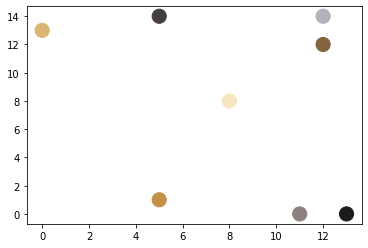

In [21]:
x = np.random.randint(0,15,size = (8,2))
plt.scatter(x[:,0],x[:,1],color = newPixel,s = 200)

In [24]:
y_ = model.predict(data2) # 预测结果，每个图片中像素的点的类别
y_

array([3, 3, 3, ..., 4, 1, 1])

In [23]:
model.labels_

array([3, 3, 3, ..., 4, 1, 1])

In [32]:
newBird = newPixel[y_]
newBird.shape

(16384, 3)

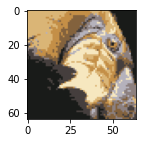

In [36]:
plt.figure(figsize=(2,2))
plt.imshow(newBird.reshape(128,128,3)[::2,::2])

### DBSCAN案例介绍

#### 创建

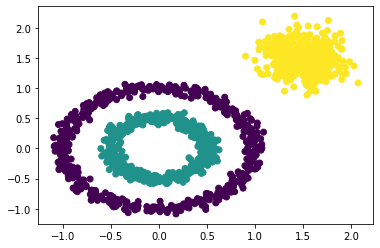

In [40]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt

# y中是两类：0,1
X,y = datasets.make_circles(n_samples=1000,noise=0.05,factor = 0.5)
# centers = [(1.5,1.5)] 元组，代表着，中心点的坐标值
# y1一类：0 + 2
X1,y1 = datasets.make_blobs(n_samples=500,n_features=2,centers=[(1.5,1.5)],cluster_std=0.2)

# 将circle和散点进行了数据合并
X = np.concatenate([X,X1])
y = np.concatenate([y,y1 + 2])
plt.scatter(X[:,0],X[:,1],c = y)

#### Kmeans建模

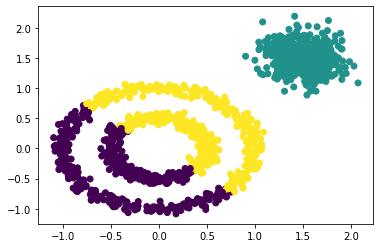

In [42]:
# 根据距离，划分‘势力范围’
kmeans = KMeans(n_clusters=3) # 分成3类
kmeans.fit(X)
y_ = kmeans.labels_
plt.scatter(X[:,0],X[:,1],c = y_)

#### DBSCAN建模

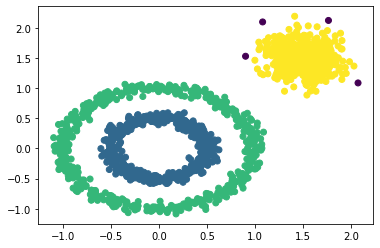

In [59]:
model = DBSCAN(eps = 0.15,min_samples = 5, metric='euclidean')

model.fit(X)

y_ = model.labels_

plt.scatter(X[:,0],X[:,1],c = y_)

In [60]:
np.unique(y_)

array([-1,  0,  1,  2], dtype=int64)

In [56]:
cond = y_ == - 1
X[cond]

array([[1.41129351, 2.19375438],
       [2.06974625, 1.0869304 ],
       [1.76251153, 2.12402624],
       [0.90110374, 1.52991236],
       [1.07830302, 2.09920055],
       [1.30583012, 0.9494782 ],
       [1.53864758, 0.8853783 ]])

### 分层聚类

#### 导包

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

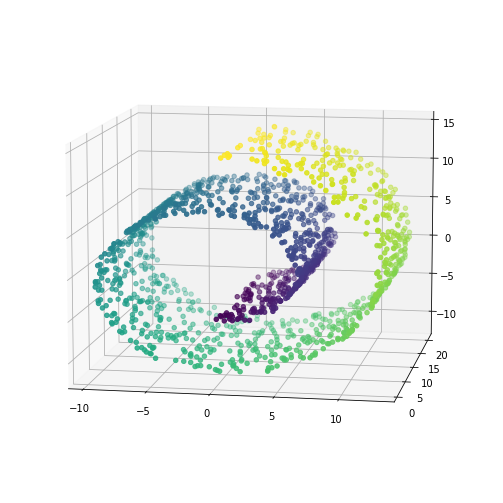

In [62]:
X,y = datasets.make_swiss_roll(n_samples=1500,noise = 0.05)

fig = plt.figure(figsize=(12,9))

a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y)
a3.view_init(10,-80)

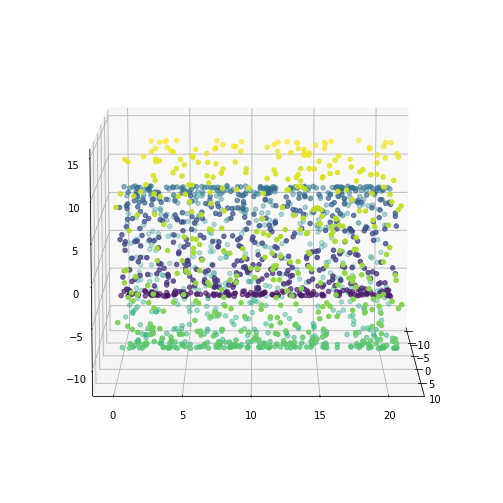

In [68]:
fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y)
a3.view_init(10,0)

#### Kmeans聚类

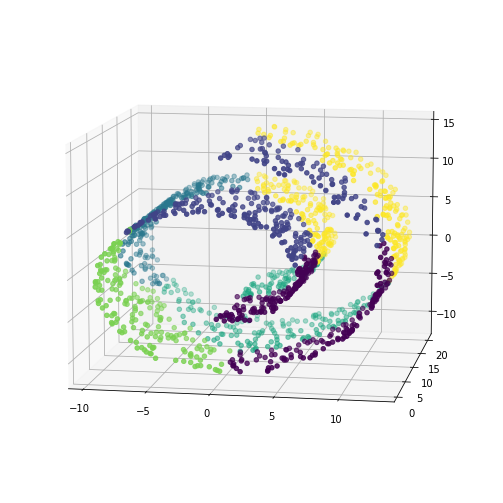

In [69]:
# Kmeans只负责分类，随机性，类别是数字几，不固定
clf = KMeans(n_clusters=6)
clf.fit(X)

y_ = clf.labels_
fig = plt.figure(figsize=(12,9))
a3 = plt.subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80)

#### 分层聚类

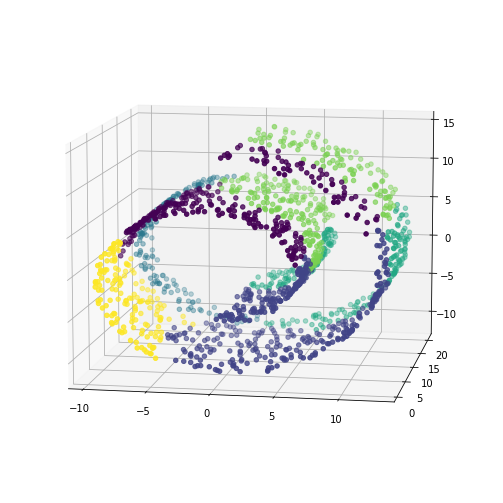

In [70]:
agg = AgglomerativeClustering(n_clusters=6,linkage='ward')# 最近的距离，作为标准，

agg.fit(X)
y_ = agg.labels_
fig = plt.figure(figsize=(12,9))
a3 = plt.subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80)

#### 连接性约束

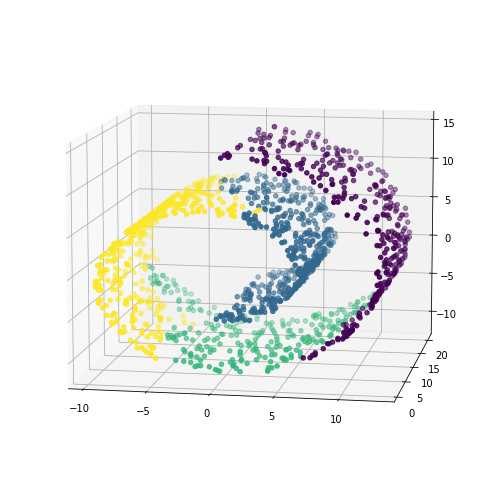

In [74]:
from sklearn.neighbors import kneighbors_graph# graph图形的意思
# 邻居数量变少，认为，条件宽松
conn = kneighbors_graph(X,n_neighbors=10) #采用邻居，进行约束


agg = AgglomerativeClustering(n_clusters=4,connectivity=conn,linkage='ward')# 最近的距离，作为标准，
agg.fit(X)
y_ = agg.labels_
fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80)